In [23]:
import sympy

LOWER_BOUND = -1
UPPER_BOUND = 1

x = sympy.symbols('x')
n = 5

basis = [x ** k for k in range(n)]

def integrate_funcs(func1, func2):
    return sympy.integrate(func1 * func2, (x, LOWER_BOUND, UPPER_BOUND))

orthonormal_basis = [
    basis[0] / sympy.sqrt(integrate_funcs(basis[0], basis[0]))
]

for i in range(1, len(basis)):
    f = basis[i]
    v_new = f
    for v in orthonormal_basis:
        v_new -= integrate_funcs(f, v) * v
        v_new /= sympy.sqrt(integrate_funcs(v_new, v_new))

    orthonormal_basis.append(v_new)

def approximate_function(func, k):
    return sum(
        integrate_funcs(func, v) * v for v in orthonormal_basis[:k]
    )

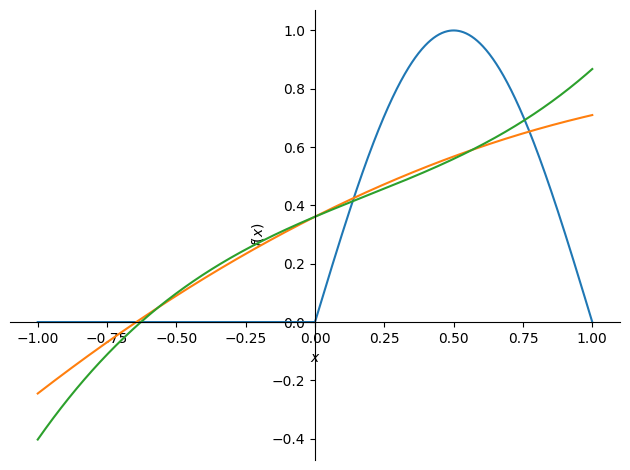

In [25]:
f = sympy.Piecewise(
    (sympy.sin(sympy.pi * x), sympy.And(0 <= x, x <= 1)),
    (0, sympy.And(-1 <= x, x <= 0))
)

approx_degree_3 = approximate_function(f, 3)
approx_degree_4 = approximate_function(f, 4)

sympy.plot(f, approx_degree_3, approx_degree_4, (x, LOWER_BOUND, UPPER_BOUND))

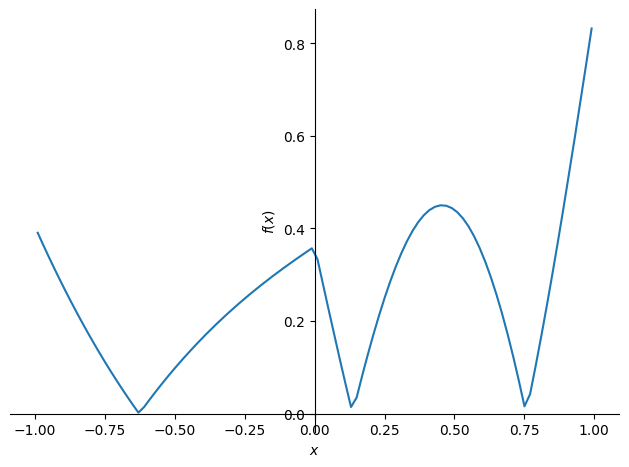

In [ ]:
sympy.plot(abs(f - approx_degree_4))